## Tenzin Yangzom
## 8896839

**Assignment 1**
**CSCN8000 Artificial Intelligence Algorithms and Mathematics**

1.	Given the symptoms exhibited in a patient and a database of anonymized patient records, predict whether the patient is likely to have an illness (Parkinson’s disease).
    A model of this decision problem could be used by a program to provide decision support to medical professionals.
  	
   You can follow the following steps :
  	
   •	Data Analysis
  	
   •	Data Preprocessing
  	
   •	Data Standardization
  	
   •	Model Training
  	
   •	Measure your model’s accuracy.
  	
      a.	Use 80% of samples as training data size.

   •	Build a predictive system to verify that the model built is able to predict the patient’s Parkinson’s disease with one instance of the dataset.
  	
You can download the Dataset from: https://archive.ics.uci.edu/dataset/470/parkinson+s+disease+classification  
Notes:
This lab should be submitted as a notebook and an HTML. Follow https://docs.github.com/en/pages/quickstart. 

In [47]:
# importing all the libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report


In [48]:
# Loading the dataset
df = pd.read_csv('.\pd_speech_features.csv')

In [49]:
df.head()

,Unnamed: 0,Unnamed: 1,Baseline Features,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 745,Unnamed: 746,Unnamed: 747,Unnamed: 748,Unnamed: 749,Unnamed: 750,Unnamed: 751,Unnamed: 752,Unnamed: 753,Unnamed: 754
0,id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
1,0,1,0.85247,0.71826,0.57227,240,239,0.00806353,8.68E-05,0.00218,...,1.562,2.6445,3.8686,4.2105,5.1221,4.4625,2.6202,3.0004,18.9405,1
2,0,1,0.76686,0.69481,0.53966,234,233,0.008258256,7.31E-05,0.00195,...,1.5589,3.6107,23.5155,14.1962,11.0261,9.5082,6.5245,6.3431,45.178,1
3,0,1,0.85083,0.67604,0.58982,232,231,0.00833959,6.04E-05,0.00176,...,1.5643,2.3308,9.4959,10.7458,11.0177,4.8066,2.9199,3.1495,4.7666,1
4,1,0,0.41121,0.79672,0.59257,178,177,0.010857733,0.000182739,0.00419,...,3.7805,3.5664,5.2558,14.0403,4.2235,4.6857,4.846,6.265,4.0603,1


**Data Preprocessing**

In [50]:

df.columns = df.iloc[0]
df

,id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
0,id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
1,0,1,0.85247,0.71826,0.57227,240,239,0.00806353,8.68E-05,0.00218,...,1.562,2.6445,3.8686,4.2105,5.1221,4.4625,2.6202,3.0004,18.9405,1
2,0,1,0.76686,0.69481,0.53966,234,233,0.008258256,7.31E-05,0.00195,...,1.5589,3.6107,23.5155,14.1962,11.0261,9.5082,6.5245,6.3431,45.178,1
3,0,1,0.85083,0.67604,0.58982,232,231,0.00833959,6.04E-05,0.00176,...,1.5643,2.3308,9.4959,10.7458,11.0177,4.8066,2.9199,3.1495,4.7666,1
4,1,0,0.41121,0.79672,0.59257,178,177,0.010857733,0.000182739,0.00419,...,3.7805,3.5664,5.2558,14.0403,4.2235,4.6857,4.846,6.265,4.0603,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
752,250,0,0.80903,0.56355,0.28385,417,416,0.004626942,5.22E-05,0.00064,...,3.0706,3.019,3.1212,2.4921,3.5844,3.54,3.3805,3.2003,6.8671,0
753,250,0,0.16084,0.56499,0.59194,415,413,0.004549703,0.000219994,0.00143,...,1.9704,1.7451,1.8277,2.4976,5.2981,4.2616,6.3042,10.9058,28.417,0
754,251,0,0.88389,0.72335,0.46815,381,380,0.005069271,0.000102654,0.00076,...,51.5607,44.4641,26.1586,6.3076,2.8601,2.5361,3.5377,3.3545,5.0424,0
755,251,0,0.83782,0.7489,0.49823,340,339,0.005679019,5.51E-05,0.00092,...,19.1607,12.8312,8.9434,2.2044,1.9496,1.9664,2.6801,2.8332,3.7131,0


In [51]:
# remove the redundent 1st row
df = df[1:]
df

,id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
1,0,1,0.85247,0.71826,0.57227,240,239,0.00806353,8.68E-05,0.00218,...,1.562,2.6445,3.8686,4.2105,5.1221,4.4625,2.6202,3.0004,18.9405,1
2,0,1,0.76686,0.69481,0.53966,234,233,0.008258256,7.31E-05,0.00195,...,1.5589,3.6107,23.5155,14.1962,11.0261,9.5082,6.5245,6.3431,45.178,1
3,0,1,0.85083,0.67604,0.58982,232,231,0.00833959,6.04E-05,0.00176,...,1.5643,2.3308,9.4959,10.7458,11.0177,4.8066,2.9199,3.1495,4.7666,1
4,1,0,0.41121,0.79672,0.59257,178,177,0.010857733,0.000182739,0.00419,...,3.7805,3.5664,5.2558,14.0403,4.2235,4.6857,4.846,6.265,4.0603,1
5,1,0,0.3279,0.79782,0.53028,236,235,0.008161574,0.002668863,0.00535,...,6.1727,5.8416,6.0805,5.7621,7.7817,11.6891,8.2103,5.0559,6.1164,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
752,250,0,0.80903,0.56355,0.28385,417,416,0.004626942,5.22E-05,0.00064,...,3.0706,3.019,3.1212,2.4921,3.5844,3.54,3.3805,3.2003,6.8671,0
753,250,0,0.16084,0.56499,0.59194,415,413,0.004549703,0.000219994,0.00143,...,1.9704,1.7451,1.8277,2.4976,5.2981,4.2616,6.3042,10.9058,28.417,0
754,251,0,0.88389,0.72335,0.46815,381,380,0.005069271,0.000102654,0.00076,...,51.5607,44.4641,26.1586,6.3076,2.8601,2.5361,3.5377,3.3545,5.0424,0
755,251,0,0.83782,0.7489,0.49823,340,339,0.005679019,5.51E-05,0.00092,...,19.1607,12.8312,8.9434,2.2044,1.9496,1.9664,2.6801,2.8332,3.7131,0


**Data Analysis**

In [52]:
# data statistics
df.describe()

,id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
count,756,756,756,756,756,756,756,756,756,756,...,756,756,756,756,756,756,756,756,756,756
unique,252,2,740,745,748,315,319,755,646,358,...,749,755,752,753,749,752,753,753,754,2
top,0,1,0.82273,0.72248,0.62128,237,236,0.006004477,7.17E-05,0.00076,...,1.7726,4.0251,2.8454,4.2105,2.6829,3.1144,12.595,4.2391,3.2941,1
freq,3,390,3,2,2,9,8,2,3,9,...,2,2,2,2,2,2,2,2,2,564


In [53]:
df.isnull().sum()  # No missing value

0
id                           0
gender                       0
PPE                          0
DFA                          0
RPDE                         0
                            ..
tqwt_kurtosisValue_dec_33    0
tqwt_kurtosisValue_dec_34    0
tqwt_kurtosisValue_dec_35    0
tqwt_kurtosisValue_dec_36    0
class                        0
Length: 755, dtype: int64

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 1 to 756
Columns: 755 entries, id to class
dtypes: object(755)
memory usage: 4.4+ MB


In [56]:
# dropping the 1st column
df

,id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
1,0,1,0.85247,0.71826,0.57227,240,239,0.00806353,8.68E-05,0.00218,...,1.562,2.6445,3.8686,4.2105,5.1221,4.4625,2.6202,3.0004,18.9405,1
2,0,1,0.76686,0.69481,0.53966,234,233,0.008258256,7.31E-05,0.00195,...,1.5589,3.6107,23.5155,14.1962,11.0261,9.5082,6.5245,6.3431,45.178,1
3,0,1,0.85083,0.67604,0.58982,232,231,0.00833959,6.04E-05,0.00176,...,1.5643,2.3308,9.4959,10.7458,11.0177,4.8066,2.9199,3.1495,4.7666,1
4,1,0,0.41121,0.79672,0.59257,178,177,0.010857733,0.000182739,0.00419,...,3.7805,3.5664,5.2558,14.0403,4.2235,4.6857,4.846,6.265,4.0603,1
5,1,0,0.3279,0.79782,0.53028,236,235,0.008161574,0.002668863,0.00535,...,6.1727,5.8416,6.0805,5.7621,7.7817,11.6891,8.2103,5.0559,6.1164,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
752,250,0,0.80903,0.56355,0.28385,417,416,0.004626942,5.22E-05,0.00064,...,3.0706,3.019,3.1212,2.4921,3.5844,3.54,3.3805,3.2003,6.8671,0
753,250,0,0.16084,0.56499,0.59194,415,413,0.004549703,0.000219994,0.00143,...,1.9704,1.7451,1.8277,2.4976,5.2981,4.2616,6.3042,10.9058,28.417,0
754,251,0,0.88389,0.72335,0.46815,381,380,0.005069271,0.000102654,0.00076,...,51.5607,44.4641,26.1586,6.3076,2.8601,2.5361,3.5377,3.3545,5.0424,0
755,251,0,0.83782,0.7489,0.49823,340,339,0.005679019,5.51E-05,0.00092,...,19.1607,12.8312,8.9434,2.2044,1.9496,1.9664,2.6801,2.8332,3.7131,0


In [57]:
# dropping the id
df.drop('id', axis=1)

,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,locAbsJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
1,1,0.85247,0.71826,0.57227,240,239,0.00806353,8.68E-05,0.00218,1.76E-05,...,1.562,2.6445,3.8686,4.2105,5.1221,4.4625,2.6202,3.0004,18.9405,1
2,1,0.76686,0.69481,0.53966,234,233,0.008258256,7.31E-05,0.00195,1.61E-05,...,1.5589,3.6107,23.5155,14.1962,11.0261,9.5082,6.5245,6.3431,45.178,1
3,1,0.85083,0.67604,0.58982,232,231,0.00833959,6.04E-05,0.00176,1.47E-05,...,1.5643,2.3308,9.4959,10.7458,11.0177,4.8066,2.9199,3.1495,4.7666,1
4,0,0.41121,0.79672,0.59257,178,177,0.010857733,0.000182739,0.00419,4.55E-05,...,3.7805,3.5664,5.2558,14.0403,4.2235,4.6857,4.846,6.265,4.0603,1
5,0,0.3279,0.79782,0.53028,236,235,0.008161574,0.002668863,0.00535,4.37E-05,...,6.1727,5.8416,6.0805,5.7621,7.7817,11.6891,8.2103,5.0559,6.1164,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
752,0,0.80903,0.56355,0.28385,417,416,0.004626942,5.22E-05,0.00064,2.97E-06,...,3.0706,3.019,3.1212,2.4921,3.5844,3.54,3.3805,3.2003,6.8671,0
753,0,0.16084,0.56499,0.59194,415,413,0.004549703,0.000219994,0.00143,6.50E-06,...,1.9704,1.7451,1.8277,2.4976,5.2981,4.2616,6.3042,10.9058,28.417,0
754,0,0.88389,0.72335,0.46815,381,380,0.005069271,0.000102654,0.00076,3.87E-06,...,51.5607,44.4641,26.1586,6.3076,2.8601,2.5361,3.5377,3.3545,5.0424,0
755,0,0.83782,0.7489,0.49823,340,339,0.005679019,5.51E-05,0.00092,5.24E-06,...,19.1607,12.8312,8.9434,2.2044,1.9496,1.9664,2.6801,2.8332,3.7131,0


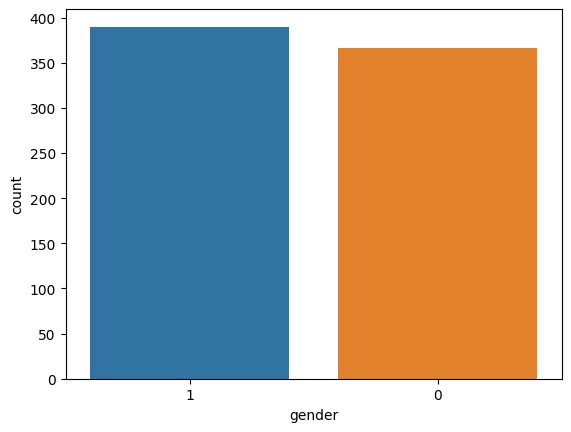

In [62]:
# Lets see how many men and women
df.gender.value_counts()
sns.countplot(data=df, x='gender')
plt.show()


<Axes: xlabel='0', ylabel='0'>

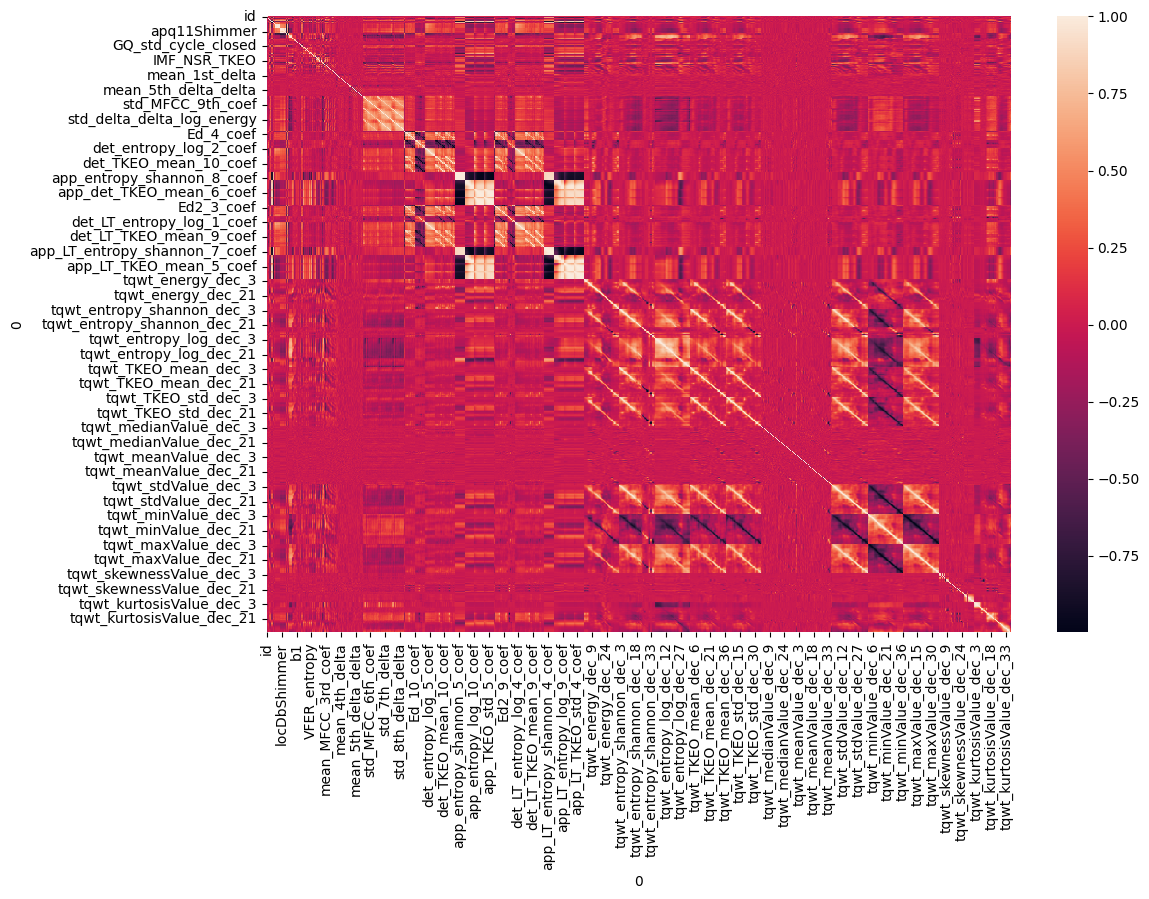

In [67]:
# Correlation 
corr = df.corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr)

**Data Standardization**

By looking at the data, we can scale the features using the Standard Scaler but the 'gender' and the target feature 'class' are in 0 and 1, which means they are binary categorical value, will leave it as it is,

In [72]:
# Store the gender and class value separately
gender = df['gender']
clas = df['class']
df_filtered = df.drop(columns=['gender', 'class'])

df_filtered

,id,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,locAbsJitter,...,tqwt_kurtosisValue_dec_27,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36
1,0,0.85247,0.71826,0.57227,240,239,0.00806353,8.68E-05,0.00218,1.76E-05,...,1.5466,1.562,2.6445,3.8686,4.2105,5.1221,4.4625,2.6202,3.0004,18.9405
2,0,0.76686,0.69481,0.53966,234,233,0.008258256,7.31E-05,0.00195,1.61E-05,...,1.553,1.5589,3.6107,23.5155,14.1962,11.0261,9.5082,6.5245,6.3431,45.178
3,0,0.85083,0.67604,0.58982,232,231,0.00833959,6.04E-05,0.00176,1.47E-05,...,1.5399,1.5643,2.3308,9.4959,10.7458,11.0177,4.8066,2.9199,3.1495,4.7666
4,1,0.41121,0.79672,0.59257,178,177,0.010857733,0.000182739,0.00419,4.55E-05,...,6.9761,3.7805,3.5664,5.2558,14.0403,4.2235,4.6857,4.846,6.265,4.0603
5,1,0.3279,0.79782,0.53028,236,235,0.008161574,0.002668863,0.00535,4.37E-05,...,7.8832,6.1727,5.8416,6.0805,5.7621,7.7817,11.6891,8.2103,5.0559,6.1164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
752,250,0.80903,0.56355,0.28385,417,416,0.004626942,5.22E-05,0.00064,2.97E-06,...,3.4394,3.0706,3.019,3.1212,2.4921,3.5844,3.54,3.3805,3.2003,6.8671
753,250,0.16084,0.56499,0.59194,415,413,0.004549703,0.000219994,0.00143,6.50E-06,...,19.6733,1.9704,1.7451,1.8277,2.4976,5.2981,4.2616,6.3042,10.9058,28.417
754,251,0.88389,0.72335,0.46815,381,380,0.005069271,0.000102654,0.00076,3.87E-06,...,137.3126,51.5607,44.4641,26.1586,6.3076,2.8601,2.5361,3.5377,3.3545,5.0424
755,251,0.83782,0.7489,0.49823,340,339,0.005679019,5.51E-05,0.00092,5.24E-06,...,5.4425,19.1607,12.8312,8.9434,2.2044,1.9496,1.9664,2.6801,2.8332,3.7131


In [75]:
# Now performing the Scaling
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_filtered)
df_scaled

array([[-1.72519117,  0.62764391,  0.2561442 , ..., -0.775137  ,
        -0.81472704, -0.36659507],
       [-1.72519117,  0.12161952, -0.08043329, ..., -0.52664699,
        -0.58297219,  0.40039616],
       [-1.72519117,  0.61795018, -0.34983882, ..., -0.75606253,
        -0.8043897 , -0.7809355 ],
       ...,
       [ 1.72519117,  0.81336154,  0.3292009 , ..., -0.71674252,
        -0.79017671, -0.77287314],
       [ 1.72519117,  0.54105055,  0.69591966, ..., -0.77132466,
        -0.82631929, -0.81173208],
       [ 1.72519117,  0.3945807 ,  0.92284035, ..., -0.68658105,
        -0.84098293, -0.82811405]])

In [78]:
df_cleaned = pd.DataFrame(df_scaled, columns=df_filtered.columns)
df_cleaned

,id,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,locAbsJitter,...,tqwt_kurtosisValue_dec_27,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36
0,-1.725191,0.627644,0.256144,0.605835,-0.846892,-0.842373,0.933328,-0.407251,-0.054993,0.037843,...,-0.445877,-0.584822,-0.619412,-0.576762,-0.482286,-0.399331,-0.484533,-0.775137,-0.814727,-0.366595
1,-1.725191,0.121620,-0.080433,0.368415,-0.907404,-0.902773,1.040014,-0.426092,-0.142570,-0.027698,...,-0.445730,-0.584895,-0.589778,0.193084,0.016183,-0.067120,-0.175566,-0.526647,-0.582972,0.400396
2,-1.725191,0.617950,-0.349839,0.733609,-0.927575,-0.922907,1.084576,-0.443557,-0.214916,-0.088871,...,-0.446030,-0.584767,-0.629033,-0.356261,-0.156055,-0.067593,-0.463462,-0.756063,-0.804390,-0.780935
3,-1.711445,-1.980560,1.382279,0.753631,-1.472186,-1.466513,2.464215,-0.275316,0.710353,1.256919,...,-0.321598,-0.532242,-0.591137,-0.522406,0.008400,-0.449894,-0.470865,-0.633475,-0.588387,-0.801583
4,-1.711445,-2.472989,1.398068,0.300123,-0.887233,-0.882640,0.987044,3.143597,1.152045,1.178269,...,-0.300835,-0.475545,-0.521356,-0.490090,-0.404833,-0.249678,-0.042021,-0.419354,-0.672216,-0.741477
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,1.711445,0.370878,-1.964406,-1.494032,0.938221,0.939445,-0.949508,-0.454833,-0.641378,-0.601407,...,-0.402551,-0.549067,-0.607926,-0.606048,-0.568065,-0.485855,-0.541021,-0.726748,-0.800868,-0.719532
752,1.711445,-3.460449,-1.943738,0.749044,0.918050,0.909245,-0.991826,-0.224083,-0.340570,-0.447165,...,-0.030964,-0.575143,-0.646996,-0.656733,-0.567791,-0.389427,-0.496835,-0.540668,-0.266633,-0.089572
753,1.725191,0.813362,0.329201,-0.152220,0.575147,0.577042,-0.707165,-0.385449,-0.595685,-0.562082,...,2.661752,0.600185,0.663206,0.296651,-0.377602,-0.526610,-0.602494,-0.716743,-0.790177,-0.772873
754,1.725191,0.541051,0.695920,0.066780,0.161646,0.164304,-0.373097,-0.450845,-0.534762,-0.502220,...,-0.356701,-0.167720,-0.306983,-0.377910,-0.582427,-0.577843,-0.637378,-0.771325,-0.826319,-0.811732


In [80]:
# Adding the gender and class column back
df_cleaned['gender'] = gender.values
df_cleaned['class'] = clas.values

df_cleaned

,id,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,locAbsJitter,...,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,gender,class
0,-1.725191,0.627644,0.256144,0.605835,-0.846892,-0.842373,0.933328,-0.407251,-0.054993,0.037843,...,-0.619412,-0.576762,-0.482286,-0.399331,-0.484533,-0.775137,-0.814727,-0.366595,1,1
1,-1.725191,0.121620,-0.080433,0.368415,-0.907404,-0.902773,1.040014,-0.426092,-0.142570,-0.027698,...,-0.589778,0.193084,0.016183,-0.067120,-0.175566,-0.526647,-0.582972,0.400396,1,1
2,-1.725191,0.617950,-0.349839,0.733609,-0.927575,-0.922907,1.084576,-0.443557,-0.214916,-0.088871,...,-0.629033,-0.356261,-0.156055,-0.067593,-0.463462,-0.756063,-0.804390,-0.780935,1,1
3,-1.711445,-1.980560,1.382279,0.753631,-1.472186,-1.466513,2.464215,-0.275316,0.710353,1.256919,...,-0.591137,-0.522406,0.008400,-0.449894,-0.470865,-0.633475,-0.588387,-0.801583,0,1
4,-1.711445,-2.472989,1.398068,0.300123,-0.887233,-0.882640,0.987044,3.143597,1.152045,1.178269,...,-0.521356,-0.490090,-0.404833,-0.249678,-0.042021,-0.419354,-0.672216,-0.741477,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,1.711445,0.370878,-1.964406,-1.494032,0.938221,0.939445,-0.949508,-0.454833,-0.641378,-0.601407,...,-0.607926,-0.606048,-0.568065,-0.485855,-0.541021,-0.726748,-0.800868,-0.719532,0,0
752,1.711445,-3.460449,-1.943738,0.749044,0.918050,0.909245,-0.991826,-0.224083,-0.340570,-0.447165,...,-0.646996,-0.656733,-0.567791,-0.389427,-0.496835,-0.540668,-0.266633,-0.089572,0,0
753,1.725191,0.813362,0.329201,-0.152220,0.575147,0.577042,-0.707165,-0.385449,-0.595685,-0.562082,...,0.663206,0.296651,-0.377602,-0.526610,-0.602494,-0.716743,-0.790177,-0.772873,0,0
754,1.725191,0.541051,0.695920,0.066780,0.161646,0.164304,-0.373097,-0.450845,-0.534762,-0.502220,...,-0.306983,-0.377910,-0.582427,-0.577843,-0.637378,-0.771325,-0.826319,-0.811732,0,0


**Model training**

In [82]:
# Splitting data into training and testing data
X = df_cleaned.drop(columns=['class'])
y = df_cleaned['class']

# training data = 80% , testing - 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [83]:
# Using Logistic Regresiion model to train the model
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train,y_train)


LogisticRegression(max_iter=1000)

**Model Accuracy**

In [86]:
# prediction on test data
tst_predict = model.predict(X_test)
accuracy_score(y_test, tst_predict)

0.8458149779735683

The Model accuracy score is 84.58% on the test data. 

**Predicting the patient’s Parkinson’s disease with one instance of the dataset.**

In [95]:
instance1 = model.predict(pd.DataFrame(X.iloc[300, :]).T)
print("The predicted class for 300th instance is :", instance1)

instance2 = model.predict(pd.DataFrame(X.iloc[700, :]).T)
print("The predicted class for 300th instance is :", instance1)


The predicted class for 300th instance is : ['1']
The predicted class for 300th instance is : ['1']
